In [0]:
install.packages("igraph") 
library(igraph)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [0]:
# Generate graph
stock_graph = read.graph("weight.txt", format="ncol", directed = FALSE)
stock_weight = edge.attributes(stock_graph)[['weight']]

In [0]:
# Get sector
name_sector = read.csv("Name_sector.csv", header = TRUE)

In [0]:
print (length(stock_weight))

[1] 121771


In [0]:
print (length(name_sector$Symbol))

[1] 505


In [0]:
# Q3
plot_mst = function(graph, weight){
    stock_mst = mst(graph, weights = weight)

    # Color
    sector_uni = unique(name_sector$Sector)
    color = rainbow(length(sector_uni))
    for (i in 1:length(V(stock_mst))){
        sector_i = name_sector$Sector[which(name_sector$Symbol == V(stock_mst)[i]$name)]
        V(stock_mst)[i]$sector = sector_i
        V(stock_mst)[i]$color = color[which(sector_uni == sector_i)]
    }

    plot(stock_mst, vertex.size=4, vertex.label=NA)

    return (stock_mst)
}

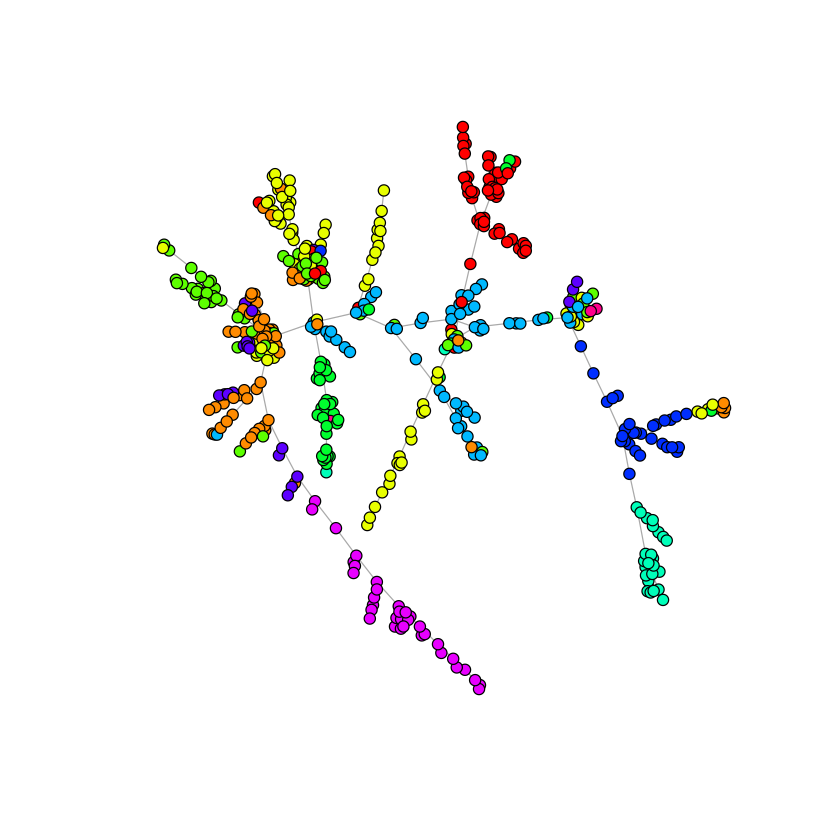

In [0]:
stock_mst = plot_mst(stock_graph, stock_weight)

In [0]:
print(stock_mst)

IGRAPH 67bf5d8 UNW- 494 493 -- 
+ attr: name (v/c), sector (v/n), color (v/c), weight (e/n)
+ edges from 67bf5d8 (vertex names):
 [1] KO  --PEP  EW  --NWL  PEG --EXC  PEG --XEL  JPM --C    JPM --AIG 
 [7] JPM --USB  TGT --TJX  TGT --DLTR ITW --XYL  ITW --TEL  ITW --PH  
[13] ITW --CSCO ITW --UTX  ITW --MMC  ITW --PX   ITW --FDX  ITW --AME 
[19] ITW --BLL  ITW --HON  ITW --GLW  ITW --MMM  ITW --FAST ITW --NUE 
[25] ITW --SWK  ITW --GD   ITW --GE   ITW --OMC  ITW --CTAS ITW --IR  
[31] ITW --CA   ITW --GPC  UAA --GPS  TDG --FISV MLM --VMC  HUM --AET 
[37] VRSK--FISV O   --CMS  O   --FRT  HES --COP  NWSA--NWS  NWSA--IVZ 
[43] CLX --KMB  COH --VFC  PSX --CVX  PSX --VLO  BAC --C    PNC --STI 
+ ... omitted several edges


In [0]:
#Q4
#for alpha_1
P = 0
for (vertex in V(stock_mst)) {
    neighbors_of_vectex = neighbors(stock_mst, vertex)
    v_sector = V(stock_mst)[vertex]$color
    Q = 0
    N = length(neighbors_of_vectex)
    for (neighbor in neighbors_of_vectex){
        if(v_sector == V(stock_mst)[neighbor]$color){
            Q = Q + 1
        }
    }
    P = P + (Q/N)
}

In [0]:
alpha_1 = P / vcount(stock_mst)
alpha_1

[1] 0.8289301

In [0]:
#for alpha_2
P = 0
counter = table(V(stock_mst)$color)
freq = counter/vcount(stock_mst)
for (vertex in V(stock_mst)) {
    v_sector == V(stock_mst)[vertex]$color
    P = P + freq[v_sector]
}

In [0]:
alpha_2 = P / vcount(stock_mst)
alpha_2

#5DFF00FF 
0.1336032

In [0]:
# Q5
# Generate graph
stock_graph_weekly = read.graph("weight_weekly.txt", format="ncol", directed = FALSE)
stock_weight_weekly = edge.attributes(stock_graph_weekly)[['weight']]

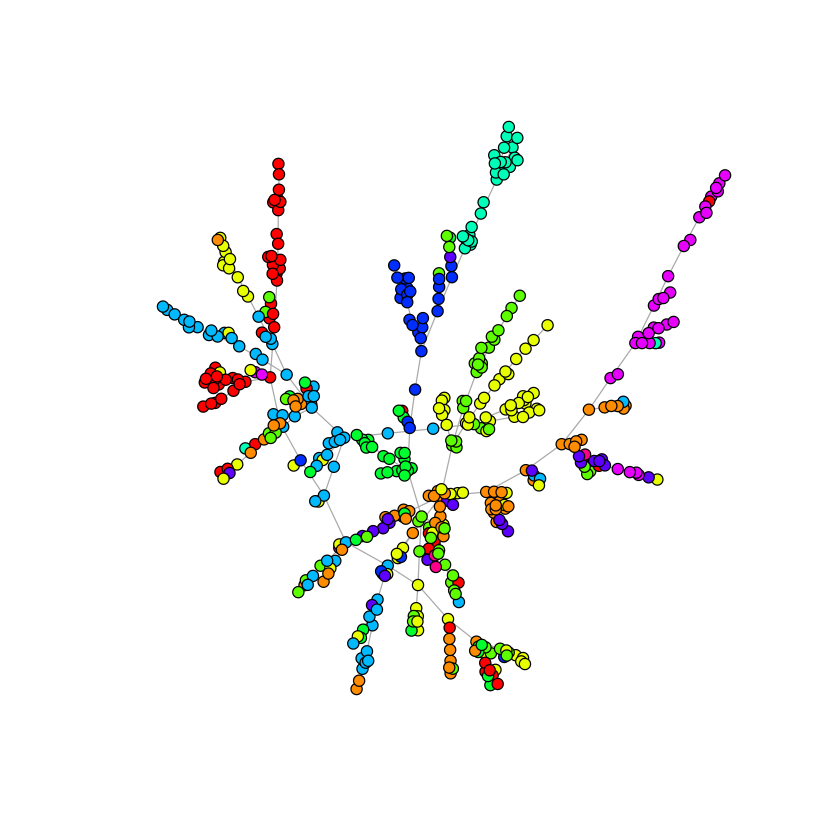

In [0]:
stock_mst_weekly = plot_mst(stock_graph_weekly, stock_weight_weekly)